In [1]:
using LinearAlgebra
using Plots

In [2]:
n = 1000
A = randn(n, n)
U, Σ, V = svd(A)
σs = exp.(range(log.(1e2), log.(1e-5), length=n))
A = U * Diagonal(σs) * V';

In [3]:
σ̃s1 = sort(svdvals(A), rev=true)               # stable algorithm
σ̃s2 = sort(sqrt.(eigvals(A' * A)), rev=true);  # unstable algorithm

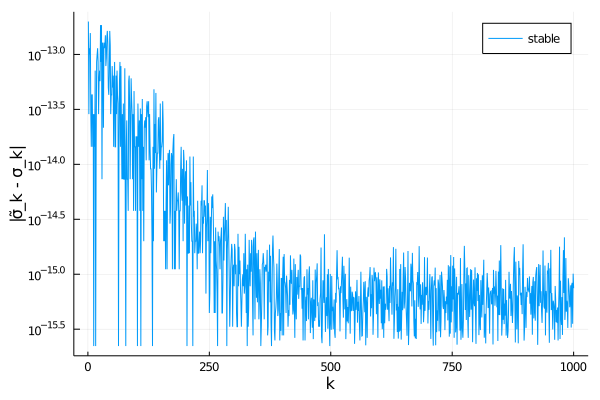

In [4]:
plot(abs.(σ̃s1 - σs) .+ eps(Float64), label="stable", yscale=:log10, ylabel="|σ̃_k - σ_k|", xlabel="k")

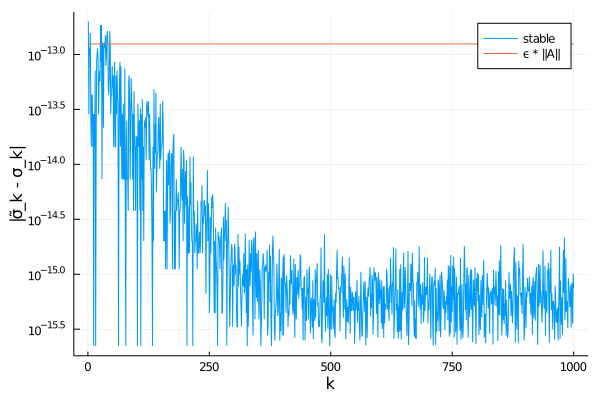

In [5]:
plot!(ones(n) * norm(A, 2) * eps(Float64), label="ϵ * ||A||")

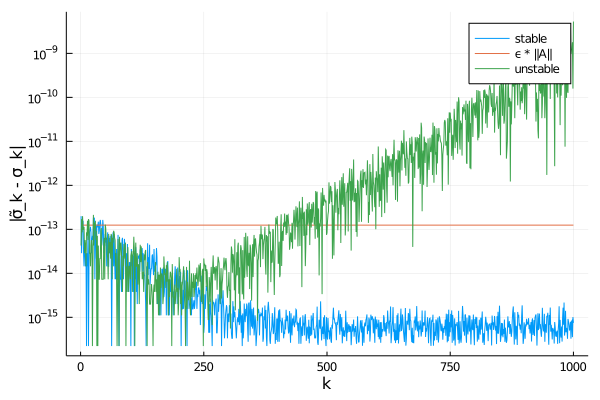

In [6]:
plot!(abs.(σ̃s2 - σs) .+ eps(Float64), label="unstable")

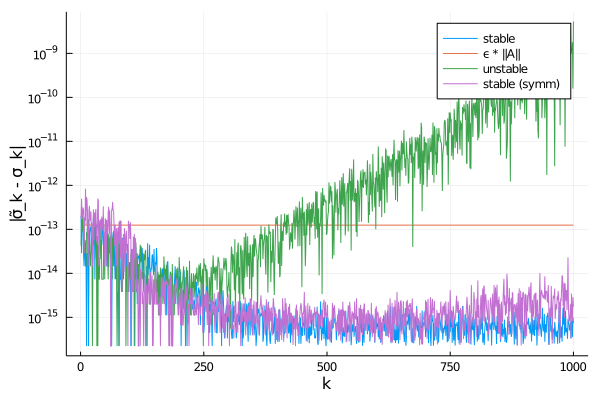

In [7]:
S = [zeros(n, n) A; A' zeros(n, n)]
σ̃s3 = sort(real.(eigvals(S)), rev=true)[1:n]
plot!(abs.(σ̃s3 - σs) .+ eps(Float64), label="stable (symm)")

In [8]:
@time eigvals(S)
@time svdvals(A)
;

  0.248947 seconds (12 allocations: 31.236 MiB)
  0.111253 seconds (9 allocations: 8.210 MiB)
